In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

In [2]:
data = pd.read_csv('cleaned_blood_type_distribution_by_country.csv', sep=",")


In [3]:
data.head()


,Country/Dependency,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,"3,074,579",34.10%,31.20%,14.50%,5.20%,6.00%,5.50%,2.60%,0.90%
1,Algeria,"43,576,691",40.00%,30.00%,15.00%,4.25%,6.60%,2.30%,1.10%,0.75%
2,Argentina,"45,479,118",50.34%,31.09%,8.20%,2.16%,4.29%,2.98%,0.74%,0.20%
3,Armenia,"3,021,324",29.00%,46.30%,12.00%,5.60%,2.00%,3.70%,1.00%,0.40%
4,Australia,"25,466,459",38.00%,32.00%,12.00%,4.00%,7.00%,6.00%,2.00%,1.00%


In [4]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 126


In [5]:
data.columns

Index(['Country/Dependency', 'Population', 'O+', 'A+', 'B+', 'AB+', 'O-', 'A-',
       'B-', 'AB-'],
      dtype='object')

In [6]:
print(data.isnull().sum()) 

Country/Dependency    0
Population            0
O+                    0
A+                    0
B+                    0
AB+                   1
O-                    1
A-                    1
B-                    1
AB-                   1
dtype: int64


1)

In [7]:
data_cleaned = data.dropna()

In [8]:
print(data_cleaned.isnull().sum()) 

Country/Dependency    0
Population            0
O+                    0
A+                    0
B+                    0
AB+                   0
O-                    0
A-                    0
B-                    0
AB-                   0
dtype: int64


2) модой возраст

In [12]:
data['AB+'] = data['AB+'].fillna(data['A+'].mode()[0])  # Заполнение модой


3)категориальные другие значения

In [10]:
data['Country/Dependency'] = data['Country/Dependency'].fillna('Неизвестно')


In [11]:
# Использование get_dummies для преобразования категориальных признаков
data = pd.get_dummies(data, columns=['Country/Dependency'], drop_first=True)

print(data.head())

   Population      O+      A+      B+    AB+     O-     A-     B-    AB-  \
0   3,074,579  34.10%  31.20%  14.50%  5.20%  6.00%  5.50%  2.60%  0.90%   
1  43,576,691  40.00%  30.00%  15.00%  4.25%  6.60%  2.30%  1.10%  0.75%   
2  45,479,118  50.34%  31.09%   8.20%  2.16%  4.29%  2.98%  0.74%  0.20%   
3   3,021,324  29.00%  46.30%  12.00%  5.60%  2.00%  3.70%  1.00%  0.40%   
4  25,466,459  38.00%  32.00%  12.00%  4.00%  7.00%  6.00%  2.00%  1.00%   

   Country/Dependency_Algeria  ...  Country/Dependency_Ukraine  \
0                       False  ...                       False   
1                        True  ...                       False   
2                       False  ...                       False   
3                       False  ...                       False   
4                       False  ...                       False   

   Country/Dependency_United Arab Emirates  Country/Dependency_United Kingdom  \
0                                    False                       

In [ ]:
data_cleaned['O+'] = data['O+'].str.rstrip('%').astype(float) / 100

In [20]:
data_cleaned['Population'] = data['Population'].str.replace(',', '').astype(float)

In [21]:
scaler = MinMaxScaler()

data_cleaned[['O+', 'Population']] = scaler.fit_transform(data_cleaned[['O+', 'Population']])


In [22]:
print(data_cleaned.head())

  Country/Dependency  Population        O+      A+      B+    AB+     O-  \
0            Albania    0.000391  0.147917  31.20%  14.50%  5.20%  6.00%   
1            Algeria    0.005601  0.270833  30.00%  15.00%  4.25%  6.60%   
2          Argentina    0.005846  0.486250  31.09%   8.20%  2.16%  4.29%   
3            Armenia    0.000384  0.041667  46.30%  12.00%  5.60%  2.00%   
4          Australia    0.003271  0.229167  32.00%  12.00%  4.00%  7.00%   

      A-     B-    AB-  
0  5.50%  2.60%  0.90%  
1  2.30%  1.10%  0.75%  
2  2.98%  0.74%  0.20%  
3  3.70%  1.00%  0.40%  
4  6.00%  2.00%  1.00%  


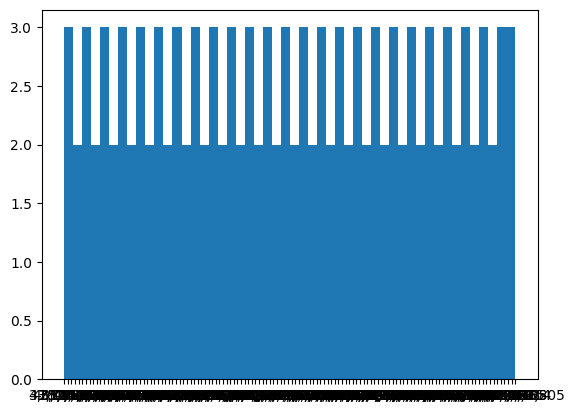

In [23]:
plt.hist(data['Population'], 50)
plt.show()